<a href="https://colab.research.google.com/github/Kieunhungtruong/Econometrics/blob/main/Econometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


<div style="display: flex; flex-direction: column; align-items: center; justify-content: center; gap: 10px;">
    <a href="https://www.hapri.org/" target="_blank" style="transition: transform 0.2s;">
        <img src="https://media.licdn.com/dms/image/v2/C510BAQHfKKEcpmwqnQ/company-logo_200_200/company-logo_200_200/0/1630623930351?e=1749686400&amp;v=beta&amp;t=lHyn6J1Qg4cUQcmf7CcOUvRiMN4WzggNO40SO2yZQXI"
             width="100"
             alt="HAPRI - Viện Nghiên cứu Chính sách Nông nghiệp & Sức khỏe"
             style="border-radius: 10px;">
    </a>
    <h1 style="text-align: center; font-size: 26px; font-weight: bold; font-family:'Nunito'; color: purple;">
        Chapter 1
    </h1>
</div>


**Gọi các gói cần thiết trong chương 1:**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go


In [29]:
# Bảng màu mẫu
palette = ["#53b0ae", "#a31414", "#2b6999", "#e37000", "#b2c615", "#88837d"]
labels = ["cyan", "Red", "Dark Blue", "Orange", "Green", "Gray"]

In [30]:
def sumdetail(df, column):
    """ Hiển thị thống kê chi tiết của một biến số giống Stata 'sum, detail' """

    # Tính các percentiles
    percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
    percentile_values = np.percentile(df[column].dropna(), percentiles)

    # Các thống kê khác
    obs = df[column].count()
    total = df[column].sum()
    mean = df[column].mean()
    std_dev = df[column].std()
    variance = df[column].var()
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()
    smallest = df[column].nsmallest(3).values  # 3 giá trị nhỏ nhất
    largest = df[column].nlargest(3).values  # 3 giá trị lớn nhất

    # Hiển thị kết quả
    print(f"{column.upper()}\n" + "-"*60)
    print(f"{'Percentiles':<15}{'Smallest':<15}")
    for i in range(len(percentiles)):
        if i < 3:
            print(f"{percentiles[i]:<5}{percentile_values[i]:<15,.2f}{smallest[i]:<15,.2f}")
        else:
            print(f"{percentiles[i]:<5}{percentile_values[i]:<15,.2f}")

    print(f"\n{'Obs':<20}{obs:,}")
    print(f"{'Sum':<20}{total:,.2f}")
    print(f"{'Mean':<20}{mean:,.2f}")
    print(f"{'Std. Dev.':<20}{std_dev:,.2f}")
    print(f"{'Variance':<20}{variance:,.2f}")
    print(f"{'Skewness':<20}{skewness:.6f}")
    print(f"{'Kurtosis':<20}{kurtosis:.6f}")
    print(f"\n{'Largest':<15}")
    for i in range(3):
        print(f"{largest[i]:,.2f}")

In [31]:
# Đọc file Stata
df = pd.read_stata("/content/drive/MyDrive/econometrics/rawdata/migration_remittances_16_full.dta")

# Xem thông tin dữ liệu
print(df.head())

     tinh  huyen  xa  diaban  hoso  num_migration  marital_status  HHsize  \
0  Ha Noi      1   4       8    14            NaN               0     2.0   
1  Ha Noi      1   4       8    15            NaN               1     5.0   
2  Ha Noi      1   4       8    19            NaN               1     2.0   
3  Ha Noi      1   7       6    13            NaN               1     3.0   
4  Ha Noi      1   7       6    14            NaN               1     5.0   

   agehead  num_children0_5  ...  durables_share  housing_share  others_share  \
0     63.0              0.0  ...        0.000000       0.030590      0.021175   
1     37.0              0.0  ...        0.026955       0.011273      0.006304   
2     61.0              0.0  ...        0.000000       0.027630      0.013743   
3     62.0              0.0  ...        0.018952       0.022694      0.014611   
4     62.0              0.0  ...        0.000000       0.067794      0.004254   

   healthcare_share  education_share  RedRiverDelt

<ipython-input-31-a5324968f16b>:2: UnicodeWarning:


One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.



In [32]:
print(df.loc[0:19, ['per_expenditure', 'remittances']].applymap(lambda x: f"{x:.1f}"))

   per_expenditure remittances
0          57732.0     60000.0
1         119605.6     65000.0
2          59211.5      5000.0
3          54523.7      7000.0
4          66294.8     10000.0
5         147202.5      8000.0
6          46908.5     10000.0
7          65866.0      7000.0
8          38047.7      6000.0
9          37322.0     10000.0
10         50906.4      5000.0
11         54765.2     60000.0
12         44007.2     29500.0
13         37130.4      7000.0
14         19506.8      2000.0
15         65775.8     12000.0
16         58190.7      6000.0
17        263917.2     15000.0
18         51537.0     24000.0
19         35963.0      4000.0


<ipython-input-32-5142048a8d77>:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [33]:
sumdetail(df, 'per_expenditure')

PER_EXPENDITURE
------------------------------------------------------------
Percentiles    Smallest       
1    4,963.69       1,439.00       
5    7,885.75       1,759.50       
10   10,057.20      2,054.80       
25   14,447.17      
50   21,311.50      
75   32,136.83      
90   46,488.60      
95   58,830.10      
99   105,417.56     

Obs                 9,399
Sum                 250,343,984.00
Mean                26,635.17
Std. Dev.           22,829.52
Variance            521,187,072.00
Skewness            5.771963
Kurtosis            61.185425

Largest        
457,283.25
363,633.00
362,254.50


In [34]:
fig = px.histogram(df, x="per_expenditure", nbins=27, histnorm="percent")

# Cập nhật viền màu cho các cột
fig.update_traces(marker=dict(color= palette[5], line=dict(width=1, color="#B3B3B3")))

fig.show()

In [35]:
min_val = df["per_expenditure"].min()
max_val = df["per_expenditure"].max()
bin_size = (max_val - min_val) / 27  # Chia thành 27 khoảng

# Tạo biểu đồ
fig = go.Figure(go.Histogram(
    x=df["per_expenditure"],
    histnorm="percent",
    xbins=dict(start=min_val, end=max_val, size=bin_size)  # Chia bin theo kích thước cố định
))

fig.show()

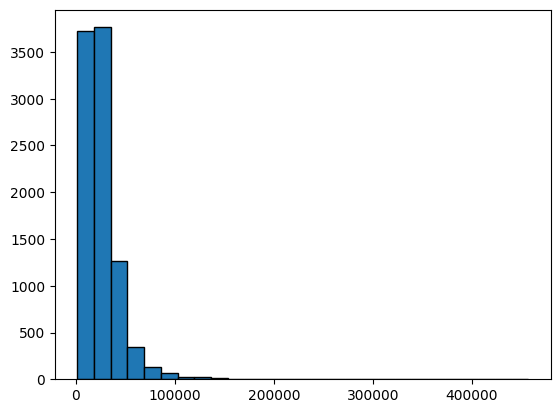

In [36]:
plt.hist(df["per_expenditure"], bins=27, edgecolor="black")

# Hiển thị biểu đồ
plt.show()

In [37]:
mean_value = df['per_expenditure'].mean()